In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import seaborn as sns
from test_generator import Line, generate_image, apply_general_noise
from line_utils import draw_r_phi
from experiment import run_exp
from polarization import MaxComponentInertionPolarization, InertionPolarization, PolarizationMethod
from peak_detection import NausWallenstein
from tree_clustering import TreeClustering
from math import pi

In [4]:
def naive_hough(test_edges):
    lines = cv.HoughLinesWithAccumulator(test_edges, rho=1, theta=0.01, threshold=1)
    h, w = len(test_edges), len(test_edges[0])
    x, y, values = [], [], []
    for i in lines:
        x.append(i[0][0])
        y.append(i[0][1])
        values.append(i[0][2] / (h + w))

    plt.figure(figsize=(25, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(test_edges, cmap="gray")

    plt.subplot(1, 3, 2)
    ax = plt.gca()
    hist, xedges, yedges = np.histogram2d(x, y, bins=100, weights=values)

    X, Y = np.meshgrid(xedges, yedges)

   
    plt.scatter(x, y, marker='o', c=values, alpha=[max(v, 1) for v in values], cmap=plt.cm.binary, vmin=-0.1, vmax=0.5)
    plt.scatter(x, y, marker='o', c=values, alpha=[0 if v < 0.2 else 1 for v in values], cmap=plt.cm.YlOrRd)
    plt.xlim((-(h + w) / 2, (h + w) / 2))
    #plt.xlim((35, 85))

    plt.grid()
    plt.subplot(1, 3, 3)

    print(lines)
    plt.imshow(test_edges, cmap="gray")
    print(plt.gca().get_xlim())
    for i in lines:
        if i[0][-1] / (h + w) <= 0.2:
            break
        draw_r_phi((i[0][0], pi / 2 - i[0][1]))
    plt.show()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


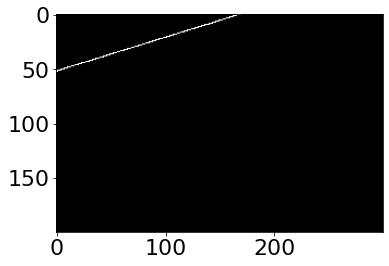

In [5]:
test_images = [
    generate_image([Line(50, 0.3, 1)]),
    generate_image([Line(50, 0.3, 1), Line(120, 0.81, 1), Line(130, 1.5, 1)]),
    generate_image([Line(50, 0.3, 1), Line(120, 0.81, 1), Line(130, 1.5, 1)]),
    generate_image([Line(60, 0.3, 2)], h=120, w=150),
    generate_image([Line(60, 0.3, 1), Line(60, 0.35, 1)], h=120, w=150),

]
apply_general_noise(test_images[2], lambda: np.random.normal(180, 40, 2), 0.22)
#plt.imshow(test_im / 255, cmap='gray')
test_edges = [255 - test_images[i] for i in range(len(test_images))]#cv.Canny(test_img, 10, 20)
plt.show()
plt.imshow(test_edges[0], cmap='gray')

[[[ 49.          1.27      115.       ]]

 [[ 50.          1.26      103.       ]]

 [[ 51.          1.25       68.       ]]

 ...

 [[-43.          3.1299999   2.       ]]

 [[-36.          3.1299999   2.       ]]

 [[-33.          3.1299999   2.       ]]]
(-0.5, 299.5)


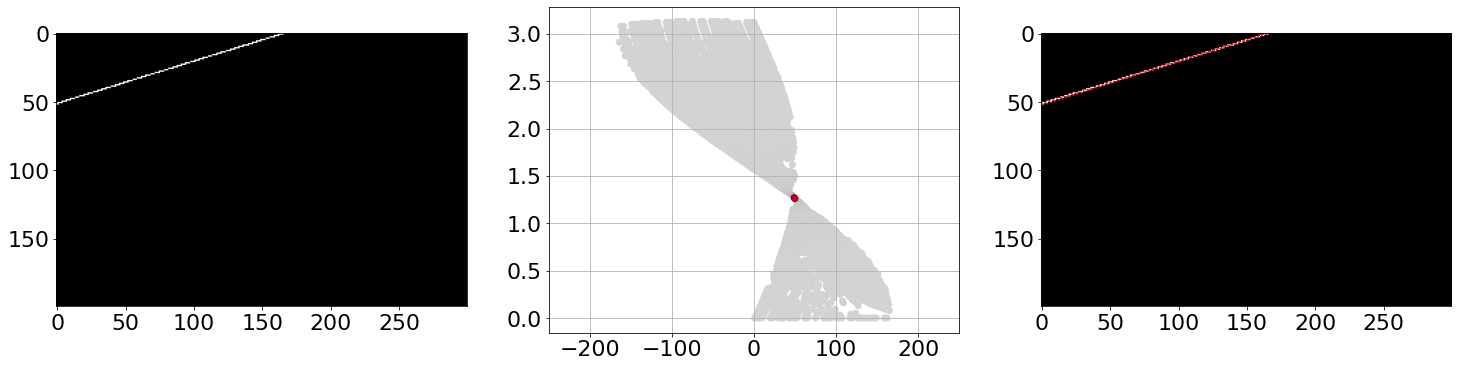

0 (48.344968560601906, 6.576257294210801)
1 (48.344968560601906, 0.2930719870312136)


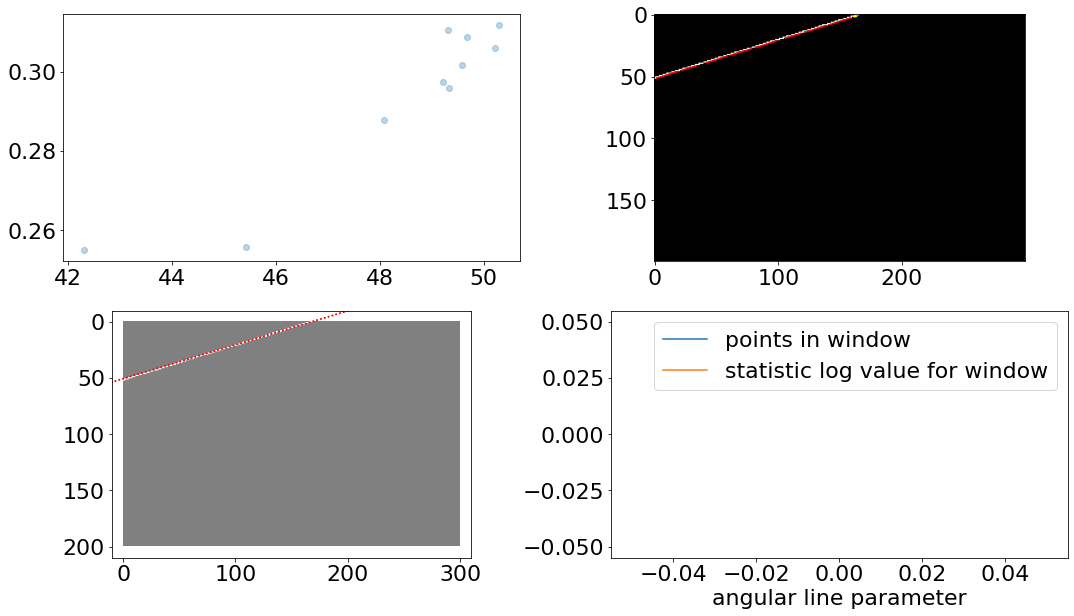

{(48.344968560601906, 0.2930719870312136): -4.6511704369249225, (48.344968560601906, 6.576257294210801): -4.651170436924945}
[[[ 1.19e+02  7.60e-01  1.93e+02]]

 [[ 1.29e+02  7.00e-02  1.27e+02]]

 [[ 4.90e+01  1.27e+00  1.17e+02]]

 ...

 [[-1.64e+02  3.02e+00  2.00e+00]]

 [[-1.62e+02  3.02e+00  2.00e+00]]

 [[-1.65e+02  3.07e+00  2.00e+00]]]
(-0.5, 299.5)


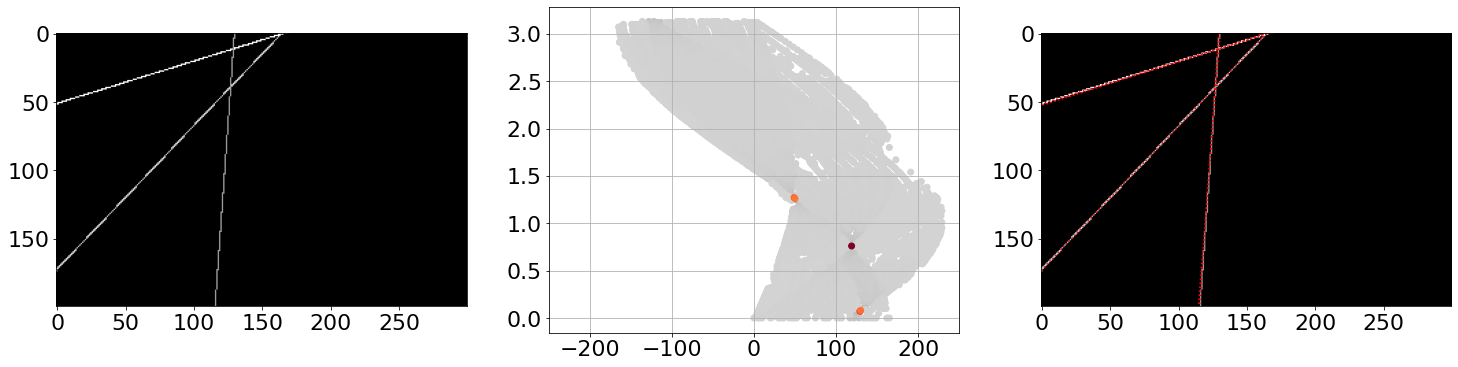

0 (119.3743001233477, 0.807182331417538)
1 (129.52664667294417, 1.498837673718507)
2 (48.76323318783408, 0.29542891307268093)
3 (48.76323318783408, 6.578614220252267)
4 (120.99473217988617, 1.5607056562475767)


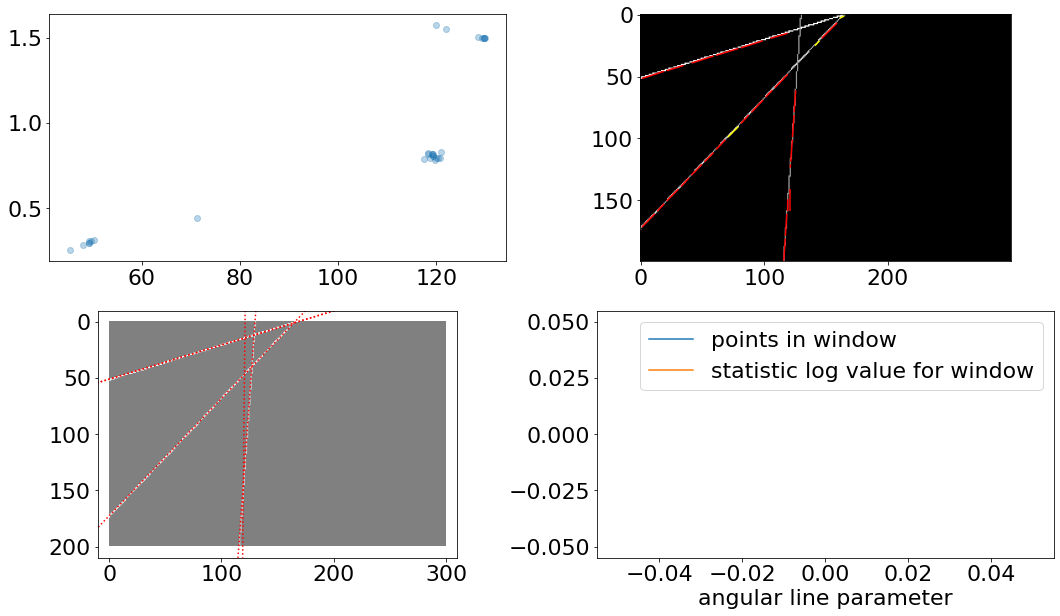

{(120.99473217988617, 1.5607056562475767): -1.6543404363937915, (129.52664667294417, 1.498837673718507): -5.268251657518883, (48.76323318783408, 0.29542891307268093): -4.141998535826069, (48.76323318783408, 6.578614220252267): -4.141998535826069, (119.3743001233477, 0.807182331417538): -7.132470012404883}
[[[ 1.1900000e+02  7.5999999e-01  1.9300000e+02]]

 [[ 1.2900000e+02  7.0000000e-02  1.3400000e+02]]

 [[ 1.3000000e+02  7.9999998e-02  1.2100000e+02]]

 ...

 [[-2.9300000e+02  3.1199999e+00  2.0000000e+00]]

 [[-2.8200000e+02  3.1199999e+00  2.0000000e+00]]

 [[-2.9500000e+02  3.1299999e+00  2.0000000e+00]]]
(-0.5, 299.5)


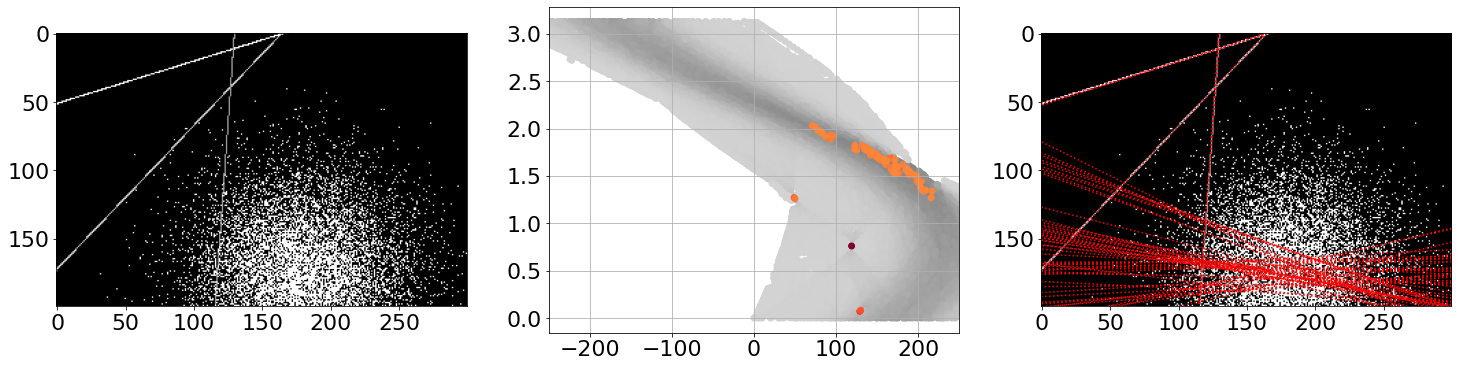

0 (119.49387661289529, 0.8075085962122486)
1 (48.76323318783408, 0.29542891307268093)
2 (48.76323318783408, 6.578614220252267)
3 (127.96759545637971, 1.511811129872671)
4 (120.37355440724659, 1.5680091443636375)


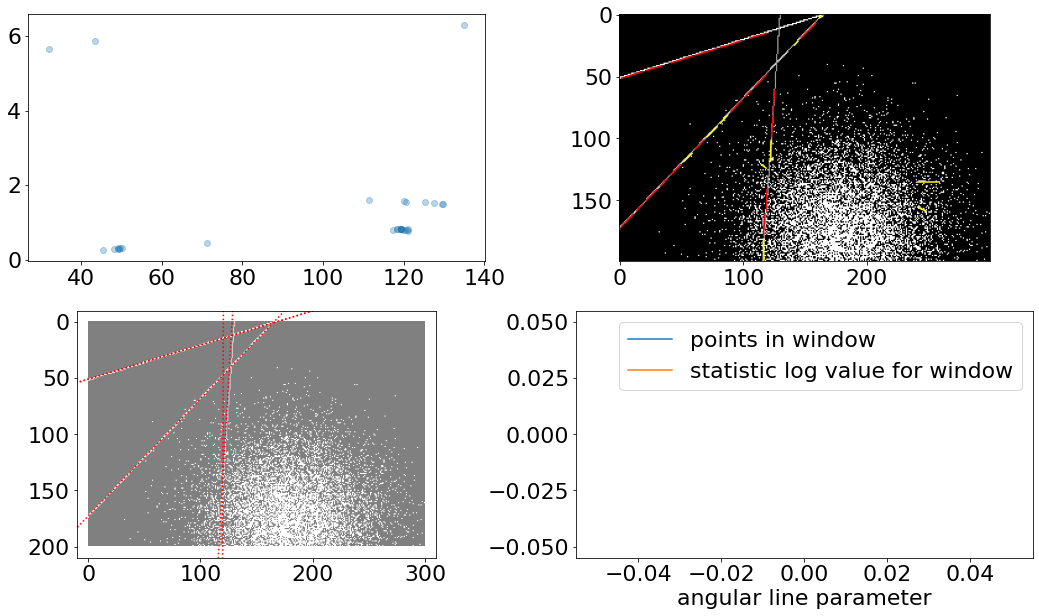

{(120.37355440724659, 1.5680091443636375): -1.7718427950085123, (127.96759545637971, 1.511811129872671): -2.5653268660477644, (48.76323318783408, 0.29542891307268093): -4.141998535826069, (48.76323318783408, 6.578614220252267): -4.141998535826069, (119.49387661289529, 0.8075085962122486): -6.172734267850649}
[[[  59.      1.27  150.  ]]

 [[  60.      1.26  114.  ]]

 [[  62.      1.24   72.  ]]

 ...

 [[ -88.      2.71    2.  ]]

 [[-122.      2.72    2.  ]]

 [[ -94.      2.73    2.  ]]]
(-0.5, 149.5)


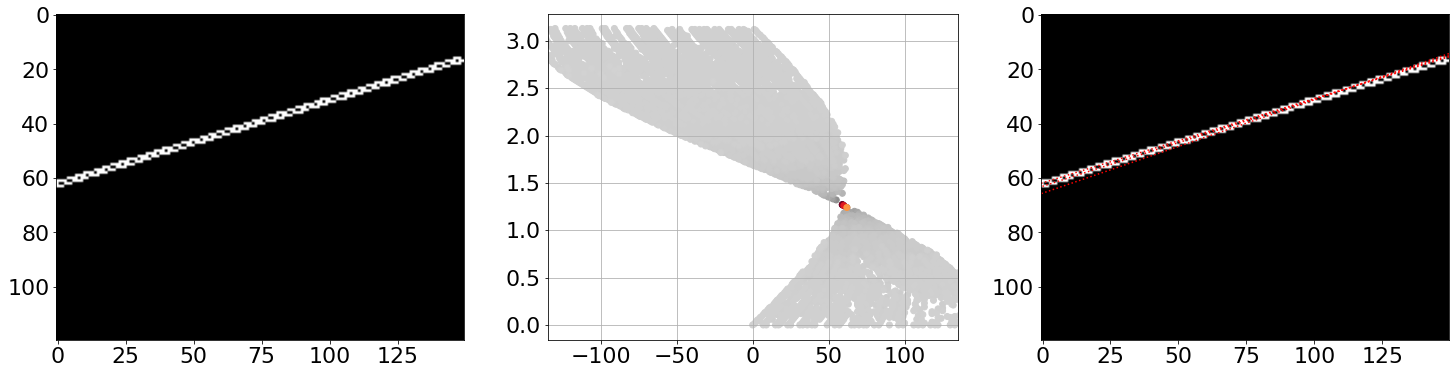

0 (59.245013483078445, 0.2954903134738845)
1 (59.245013483078445, 6.578675620653471)
2 (60.16911988806473, 6.493289782411349)
3 (60.16911988806473, 0.21010447523176265)
4 (50.99075042543569, 6.456927143003728)


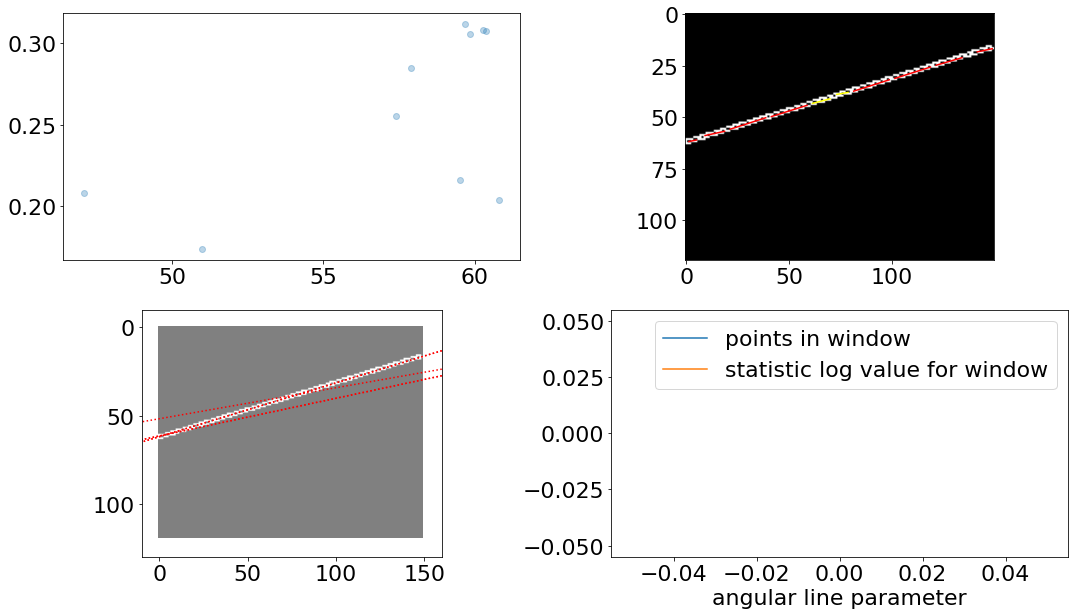

{(50.99075042543569, 6.456927143003728): -1.0, (60.16911988806473, 0.21010447523176265): -1.651443613903687, (60.16911988806473, 6.493289782411349): -1.6514436139036892, (59.245013483078445, 6.578675620653471): -3.370249674253574, (59.245013483078445, 0.2954903134738845): -3.3702496742535826}
[[[ 59.          1.23      113.       ]]

 [[ 60.          1.2099999 109.       ]]

 [[ 59.          1.28      108.       ]]

 ...

 [[ -9.          3.12        2.       ]]

 [[ -6.          3.12        2.       ]]

 [[ -3.          3.12        2.       ]]]
(-0.5, 149.5)


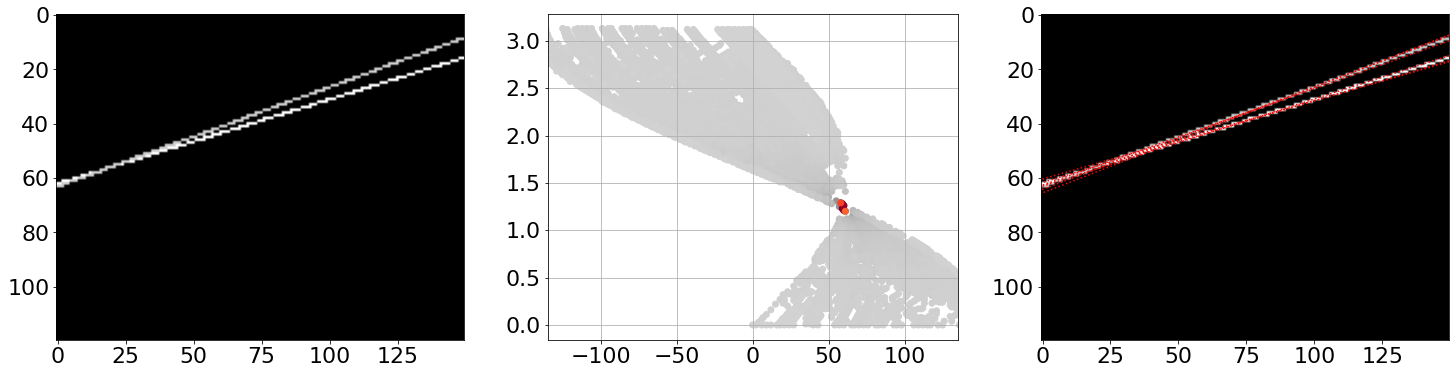

0 (59.226146979480475, 0.3249755084128702)
1 (59.32558312493837, 6.579475507943784)


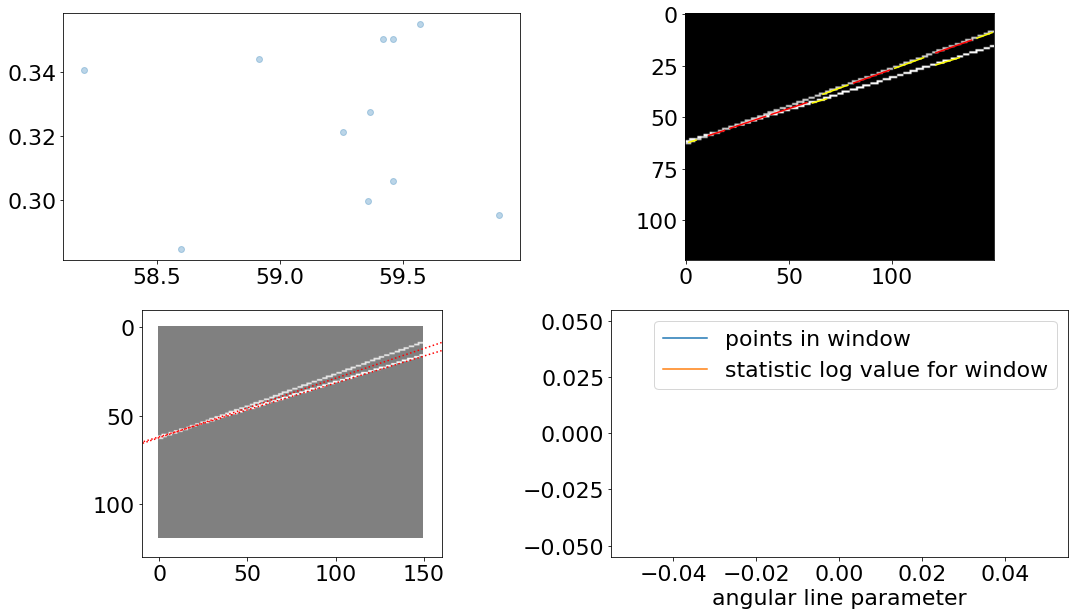

{(59.32558312493837, 6.579475507943784): -3.10862176807277, (59.226146979480475, 0.3249755084128702): -5.518467308173987}


In [11]:
font = {'family' : 'normal',
        'weight' : 'regular',
        'size'   : 22}
import matplotlib
matplotlib.rc('font', **font)
for l in test_edges:
    naive_hough(l)
    exp_data = run_exp(l, edge=True, grid_size=20, #overlapping_step=3,
                       polarization_method=MaxComponentInertionPolarization(10, 5),
                       peak_detection_method=TreeClustering(alpha=0.1, rescale=sum(l.shape) / (2 * pi), cutting_dist=0.05))
    exp_data.visualize(compact=True)
    print(exp_data.peaks)